In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-05-23 17:13:43.811164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748020424.136137      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748020424.228511      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['Serial No.'],inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
scaler=MinMaxScaler()

In [17]:
x_trained_scaled=scaler.fit_transform(x_train)

In [18]:
x_test_scaled=scaler.transform(x_test)

In [19]:
model=Sequential()

In [41]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272 (1.07 KB)

 Trainable params: 142 (568.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130 (524.00 B)

In [43]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [44]:
history=model.fit(x_trained_scaled,y_train,epochs=300,validation_split=0.2)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0000e+00 - loss: 0.5518 - val_accuracy: 0.0000e+00 - val_loss: 0.5774
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.5160 - val_accuracy: 0.0000e+00 - val_loss: 0.5447
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4843 - val_accuracy: 0.0000e+00 - val_loss: 0.5147
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4520 - val_accuracy: 0.0000e+00 - val_loss: 0.4875
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4308 - val_accuracy: 0.0000e+00 - val_loss: 0.4623
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4083 - val_accuracy: 0.0000e+00 - val_loss: 0.4352
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.3805 - val_accuracy: 0.0000e+00 - val_loss: 0.4062
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [45]:
y_pred=model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [46]:
y_pred

array([[0.6565343 ],
       [0.71028334],
       [0.9392664 ],
       [0.7321521 ],
       [0.82232136],
       [0.6680611 ],
       [0.7517971 ],
       [0.7121139 ],
       [0.7982827 ],
       [0.65527296],
       [0.6702873 ],
       [0.47485352],
       [0.79731387],
       [0.7867621 ],
       [0.7779076 ],
       [0.8704166 ],
       [0.6348907 ],
       [0.76722497],
       [0.90745   ],
       [0.6592005 ],
       [0.61586744],
       [0.795763  ],
       [0.8440303 ],
       [0.544178  ],
       [0.80265075],
       [0.57899535],
       [0.95151883],
       [0.65604573],
       [0.8730709 ],
       [0.712831  ],
       [0.6417794 ],
       [0.81688917],
       [0.6014596 ],
       [0.9142061 ],
       [0.5084747 ],
       [0.8227849 ],
       [0.68847287],
       [0.6360196 ],
       [0.66240364],
       [0.9141969 ],
       [0.5717524 ],
       [0.66305953],
       [0.7829314 ],
       [0.96524686],
       [0.7778576 ],
       [0.52165914],
       [0.6623106 ],
       [0.628

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,y_pred)

0.8140623845744148

In [49]:
import matplotlib.pyplot as plt

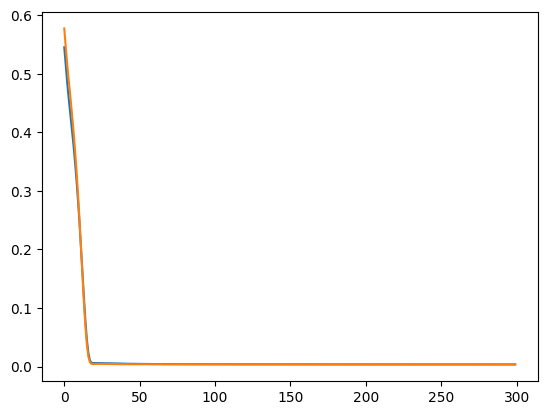

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])